In [1]:
import pandas as pd
import numpy as np

In [19]:
gtex = pd.read_table("../data/gtex_1000.csv.gz",sep='\t')
gtex

,ENSG00000122591.11,ENSG00000110934.10,ENSG00000112303.13,ENSG00000243943.9,ENSG00000200320.1,ENSG00000185523.6,ENSG00000002016.17,ENSG00000196290.14,ENSG00000171824.13,ENSG00000115459.17,...,ENSG00000180011.6,ENSG00000164124.10,ENSG00000244734.3,ENSG00000187581.2,ENSG00000213339.8,ENSG00000130165.10,ENSG00000005801.16,ENSG00000185915.5,ENSG00000144560.14,tissue
0,405969,7207,1849,76326,1137,0,57752,48599,283994,103733,...,327448,5471,18465,350,168016,132203,77422,155460,166033,Muscle - Skeletal
1,110743,4954,4145,59331,1421,0,44751,47289,130585,80527,...,302126,9517,534500,912,84383,36860,70953,22257,119196,Muscle - Skeletal
2,601549,5079,4575,122535,1548,0,74709,88950,382542,292433,...,270768,12160,176390,447,103221,206666,138026,80034,140739,Muscle - Skeletal
3,107785,4251,992,48109,263,0,32903,61342,187242,103506,...,154879,3359,232653,223,57992,99642,55399,26447,34862,Muscle - Skeletal
4,104541,2725,1358,37434,793,0,123826,45624,276829,101146,...,246964,2494,518473,705,120504,111607,46009,227114,144601,Muscle - Skeletal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3377,79761,19768,10206,156399,9039,208,122848,62718,314624,192105,...,195498,52029,734385,14,959388,229488,107154,123,329118,Pancreas
3378,20851,2991,2527,35698,2716,274,31757,21671,99782,59068,...,78579,17461,384240,0,338844,111479,44852,10,82292,Pancreas
3379,56853,8709,9006,93894,5211,0,64820,43218,176857,77350,...,140115,65180,3694,377,305473,112569,98811,267,197824,Pancreas
3380,52879,9946,6180,136779,7409,264,96992,35492,214014,127169,...,198793,54667,362916,228,557786,124295,111535,0,290844,Pancreas


In [20]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(gtex['tissue'])
gtex['tissue'] = le.transform(gtex['tissue'])
gtex

,ENSG00000122591.11,ENSG00000110934.10,ENSG00000112303.13,ENSG00000243943.9,ENSG00000200320.1,ENSG00000185523.6,ENSG00000002016.17,ENSG00000196290.14,ENSG00000171824.13,ENSG00000115459.17,...,ENSG00000180011.6,ENSG00000164124.10,ENSG00000244734.3,ENSG00000187581.2,ENSG00000213339.8,ENSG00000130165.10,ENSG00000005801.16,ENSG00000185915.5,ENSG00000144560.14,tissue
0,405969,7207,1849,76326,1137,0,57752,48599,283994,103733,...,327448,5471,18465,350,168016,132203,77422,155460,166033,4
1,110743,4954,4145,59331,1421,0,44751,47289,130585,80527,...,302126,9517,534500,912,84383,36860,70953,22257,119196,4
2,601549,5079,4575,122535,1548,0,74709,88950,382542,292433,...,270768,12160,176390,447,103221,206666,138026,80034,140739,4
3,107785,4251,992,48109,263,0,32903,61342,187242,103506,...,154879,3359,232653,223,57992,99642,55399,26447,34862,4
4,104541,2725,1358,37434,793,0,123826,45624,276829,101146,...,246964,2494,518473,705,120504,111607,46009,227114,144601,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3377,79761,19768,10206,156399,9039,208,122848,62718,314624,192105,...,195498,52029,734385,14,959388,229488,107154,123,329118,5
3378,20851,2991,2527,35698,2716,274,31757,21671,99782,59068,...,78579,17461,384240,0,338844,111479,44852,10,82292,5
3379,56853,8709,9006,93894,5211,0,64820,43218,176857,77350,...,140115,65180,3694,377,305473,112569,98811,267,197824,5
3380,52879,9946,6180,136779,7409,264,96992,35492,214014,127169,...,198793,54667,362916,228,557786,124295,111535,0,290844,5


In [21]:
from sklearn.decomposition import PCA



x = gtex.loc[:, gtex.columns.drop('tissue')].values
x = np.log(x+0.01)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])


[4 4 4 ... 5 5 5]


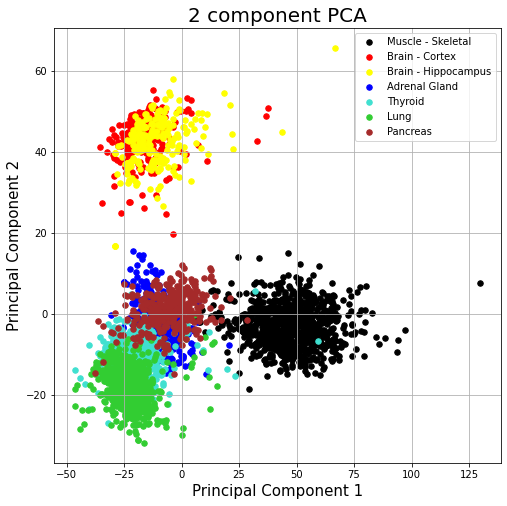

In [22]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

finalDf = pd.concat([principalDf, gtex[['tissue']]], axis = 1)

finalDf['tissue'] = le.inverse_transform(finalDf['tissue'])
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets  = ['Muscle - Skeletal','Brain - Cortex','Brain - Hippocampus','Adrenal Gland','Thyroid', 'Lung', 'Pancreas']
colors = ["black", "red", "yellow", "blue", 
          "turquoise", "limegreen", "brown"]  
cmap = ListedColormap(colors)
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['tissue'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 30)
ax.legend(targets)
ax.grid()

In [23]:
from torch.utils.data import Dataset, DataLoader


class GeneExpressionDataset(Dataset):
    '''
    Creates a Dataset class for gene expression dataset
    gene_dim is the number of genes (features)
    The rows of the dataframe contain samples, and the 
    columns contain each gene expression value.
    
    - the last column contains the label: the tissue of
    origin.
    '''
    def __init__(self, gtex):
        '''
        Args:
            csv_file (string): path to csv file
        '''
        self.dataframe = gtex
        #convert labels to numbers
        self.le = preprocessing.LabelEncoder()
        self.dataframe['tissue'] = self.le.fit_transform(self.dataframe.iloc[:,-1])
        
    def __len__(self):
        return(len(self.dataframe))
    def __getitem__(self, idx):
        expression = torch.tensor(self.dataframe.iloc[idx,0:-1].values).float()
        label = self.dataframe.iloc[idx,-1]
        return expression, label
    def inverse_transform_labels(self,x):
        return self.le.inverse_transform(x)

In [24]:
import torch.nn as nn
import torch.nn.functional as F


def multi_acc(y_pred, y_test):

    
    correct_pred = (y_pred.max(dim=1) == y_test).float()
    acc = correct_pred.sum() / len(correct_pred)
    
    acc = torch.round(acc * 100)
    
    return acc

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(in_features=1000, out_features=300)
        self.fc2 = nn.Linear(in_features=300, out_features=60)
        self.fc3 = nn.Linear(in_features=60, out_features=7)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [26]:
from sklearn.model_selection import train_test_split
from torch import optim
import torch
train,test = train_test_split(gtex_1000,test_size=0.2,random_state=42)



gtex_train = GeneExpressionDataset(train)
gtex_test = GeneExpressionDataset(test)
train_loader = torch.utils.data.DataLoader(gtex_train, batch_size=32, num_workers=0, shuffle=True)
test_loader = torch.utils.data.DataLoader(gtex_test, batch_size=32, num_workers=0, shuffle=True)

epochs = 20

net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.0001)

for epoch in range(epochs):
    train_loss = 0.0
    test_loss = 0.0
    train_acc = []
    test_acc  = []
    
    
    for inputs,labels in train_loader:
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        correct_pred = outputs.argmax(dim=1) == labels
        acc = correct_pred.sum() / len(correct_pred)

        train_loss += loss.item()
        train_acc.append(acc)
    for inputs,labels in test_loader:
        # forward only
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        
        correct_pred = outputs.argmax(dim=1) == labels
        acc = correct_pred.sum() / len(correct_pred)
        test_acc.append(acc)
    print("Epoch:", epoch)
    print("train loss:", np.round(train_loss/len(gtex_train),4),"test loss:", np.round(test_loss/len(gtex_test),4))
    print("train acc:", np.mean(train_acc).round(4),"test accuracy:", np.mean(test_acc).round(4))

        


Epoch: 0
train loss: 186.3212 test loss: 15.9414
train acc: 0.9257 test accuracy: 0.9702
Epoch: 1
train loss: 6.4267 test loss: 6.2331
train acc: 0.9871 test accuracy: 0.9915
Epoch: 2
train loss: 3.6845 test loss: 16.5583
train acc: 0.9909 test accuracy: 0.9574
Epoch: 3
train loss: 4.5664 test loss: 11.9819
train acc: 0.9827 test accuracy: 0.9801
Epoch: 4
train loss: 4.4604 test loss: 13.3638
train acc: 0.9879 test accuracy: 0.9773
Epoch: 5
train loss: 2.3184 test loss: 9.334
train acc: 0.9915 test accuracy: 0.9901
Epoch: 6
train loss: 3.6139 test loss: 12.5607
train acc: 0.9926 test accuracy: 0.9901
Epoch: 7
train loss: 1.1734 test loss: 6.0545
train acc: 0.9971 test accuracy: 0.9929
Epoch: 8
train loss: 0.6467 test loss: 10.3839
train acc: 0.9952 test accuracy: 0.9872
Epoch: 9
train loss: 0.5356 test loss: 11.1844
train acc: 0.9967 test accuracy: 0.9858
Epoch: 10
train loss: 1.3448 test loss: 7.6642
train acc: 0.9926 test accuracy: 0.9901
Epoch: 11
train loss: 0.3307 test loss: 7.180

In [27]:
train

,ENSG00000122591.11,ENSG00000110934.10,ENSG00000112303.13,ENSG00000243943.9,ENSG00000200320.1,ENSG00000185523.6,ENSG00000002016.17,ENSG00000196290.14,ENSG00000171824.13,ENSG00000115459.17,...,ENSG00000180011.6,ENSG00000164124.10,ENSG00000244734.3,ENSG00000187581.2,ENSG00000213339.8,ENSG00000130165.10,ENSG00000005801.16,ENSG00000185915.5,ENSG00000144560.14,tissue
2442,579220,98104,201112,179162,18098,0,43305,19929,277171,71942,...,181071,16517,34635728,30,120527,93397,71403,117,339908,3
2912,106169,30658,25165,150797,10718,152,80767,81907,325787,109740,...,239049,97916,8123,478,553592,198884,248871,0,357634,5
2630,119806,223787,80103,174387,3447,272,47579,70000,444644,115362,...,190748,63271,2053565,56,209488,154325,111904,0,269587,3
839,65054,9387,3905,56323,2107,155,32909,12977,136773,45005,...,95188,121016,1396715,318,168349,101138,39088,609,136215,2
3074,128568,909,453,31576,365,0,46235,51774,166399,58614,...,191677,10430,28939,431,70235,60759,41716,211300,89863,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,77976,12267,10173,244617,8919,0,123254,89908,400938,128875,...,273177,244243,1285963,92,317355,168925,165667,4900,436130,1
1130,51051,15141,15394,160313,6960,128,61950,62023,356042,95707,...,200038,181324,265664,149,299266,168645,81975,4570,318479,1
1294,56409,31947,7136,115863,2917,0,45884,72957,222317,169090,...,131797,149649,15532,0,218481,129294,63790,990,380224,0
860,154661,43083,2030,147234,6995,1047,39384,67285,235295,96602,...,153348,777863,268810,10,246053,168340,77430,4739,221576,2
